### Import Packs

In [573]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical

### Load Images

In [574]:
train_data_dir = '../Mod 6 Project/Data/Train'
test_data_dir = '../Mod 6 Project/Data/Test2'

In [575]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    train_data_dir,
                    target_size=(64,64),
                    classes=[],
                    batch_size=39209)

test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    test_data_dir,
                    target_size=(64,64),
                    classes=[],
                    batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [576]:
train_data, train_labels = next(train_batches)
test_data, test_labels = next(test_batches)

In [585]:
df = pd.read_csv('Test.csv')
df_train = pd.read_csv('Train.csv')

test_df = df['ClassId'].astype('str')
train_df = df_train['ClassId'].astype('str')
test_labels_df = test_df.str.get_dummies()
train_labels_df = train_df.str.get_dummies()

test_labels = test_labels_df.values
train_labels = train_labels_df.values

In [586]:
print('test data: {}'.format(test_data.shape))
print('test label: {}'.format(test_labels.shape))
print('train data: {}'.format(train_data.shape))
print('train label: {}'.format(train_labels.shape))

test data: (12630, 64, 64, 3)
test label: (12630, 43)
train data: (39209, 64, 64, 3)
train label: (39209, 43)


In [579]:
# from keras.utils import to_categorical

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [580]:
train_batches.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '5': 38,
 '6': 39,
 '7': 40,
 '8': 41,
 '9': 42}

### Network Architecture

In [581]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))


In [582]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_20 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)              

In [583]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [527]:
# x_val = train_data_final[:10000]
# partial_x_train = train_data_final[10000:]

# y_val = train_labels_final[:10000]
# partial_y_train = train_labels_final[10000:]

In [587]:
history = model.fit(train_data,
                    train_labels,  
                    epochs=5, 
                    batch_size=500)

Epoch 1/5
39209/39209 [==============================] - 89s 2ms/step - loss: 3.5206 - accuracy: 0.0548
Epoch 2/5
39209/39209 [==============================] - 85s 2ms/step - loss: 3.4908 - accuracy: 0.0560
Epoch 3/5
 4096/39209 [==>...........................] - ETA: 1:20 - loss: 3.5083 - accuracy: 0.0552

KeyboardInterrupt: 

In [541]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

12630/12630 [==============================] - 9s 700us/step


0.03847980871796608

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions_transfer = model.predict(test_data)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels, predictions_transfer, average='micro')

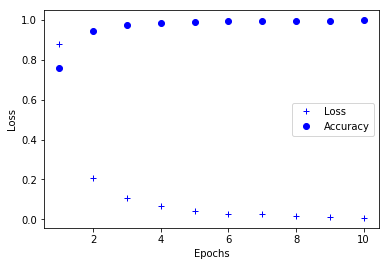

In [555]:
epochs = range(1, 11)
loss = history.history['loss']
acc = history.history['accuracy']
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, loss, 'b+', label='Loss')
plt.plot(epochs, acc, 'bo', label='Accuracy')

# "bo" is for "blue dot"
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 10 epochs, 256 batch size w/o regularuzer